In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn
from statsmodels.stats import multitest 

# Clustering

In [2]:
# load in csv to look at 
annot = pd.read_csv("all_annotated.csv")
annot

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:
# limiting dataset to median expression across 
med_vals = annot[annot.median(axis=1) > 0]
med_vals

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [4]:
transform = med_vals.iloc[:,:2].join(np.log2(med_vals.iloc[:,2:] + 0.1)).reset_index().iloc[:,1:]
# generate arrays for clustering
subject_name = np.array(list(transform.columns)[2:])
gene_names = np.array(transform.iloc[:,:2])
expression = np.array(transform.iloc[:,2:])



In [5]:
# cluster by gene
expression_gene_clustered = expression[leaves_list(linkage(expression))]
gene_name_clustered = gene_names[leaves_list(linkage(expression))]

# cluster by sample
expression_gene_sample_clustered = expression_gene_clustered.T[leaves_list(linkage(expression_gene_clustered.T))].T
subject_names_clustered = subject_name[leaves_list(linkage(expression_gene_clustered.T))]


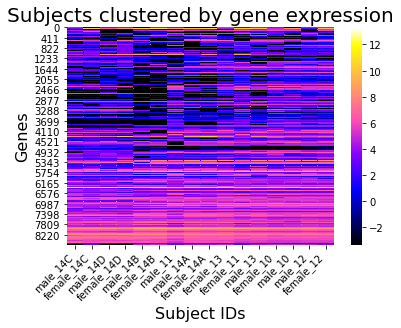

In [6]:
# because i like pretty colors: heatmap of clustered data
fig = seaborn.heatmap(expression_gene_sample_clustered, cmap = "gnuplot2")
fig.set_xticklabels(subject_names_clustered, rotation =45, ha='right')
fig.set_xlabel("Subject IDs", fontsize = 16)
fig.set_ylabel("Genes", fontsize=16)
fig.set_title("Subjects clustered by gene expression", fontsize = 20)
plt.show()

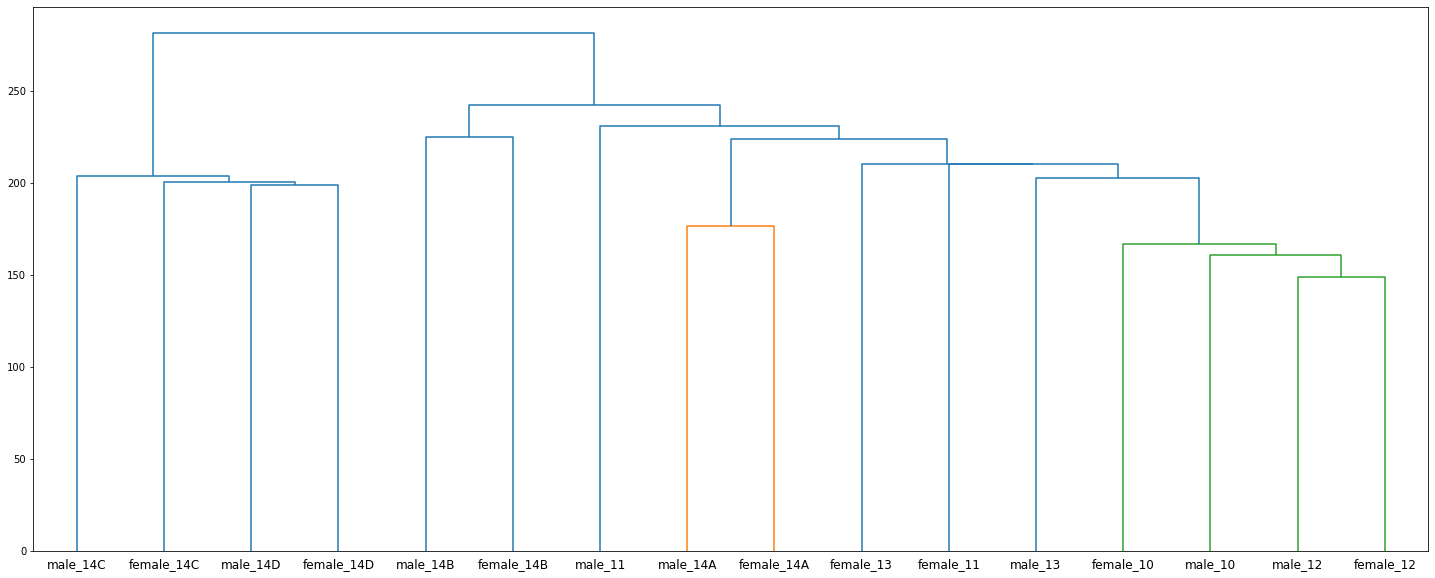

In [7]:
# dendogram of samples
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage(expression_gene_clustered.T), labels=subject_name)
plt.show()

# Differential Expression

In [10]:
# transform data so can conduct least squares regression
diff_exp_df = transform.drop(['gene_name'], axis=1).T
diff_exp_df.columns = diff_exp_df.iloc[0]
diff_exp_df = diff_exp_df.drop('t_name', axis=0)
gender = []
stage = []
for x in diff_exp_df.index:
    if 'female' in x:
        gender.append('F')
    else:
        gender.append('M')
    if '10' in x:
        stage.append(str(10))
    elif '11' in x:
        stage.append(str(11))
    elif '12' in x:
        stage.append(str(12))
    elif '13' in x:
        stage.append(str(13))
    else:
        stage.append(str(14))
diff_exp_df['gender'] = gender
diff_exp_df['stage'] = stage
diff_exp_df

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,gender,stage
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806,M,10
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,M,11
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688,M,12
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383,M,13
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,M,14
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,M,14
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,M,14
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,M,14
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295,F,10
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145,F,11


In [11]:
# get pval per transcript from OLS 
# (need to do roundabout way since expressions are now type object in df which causes issues)
transcripts = diff_exp_df.columns[0:8613]
pval = []
for tran in range(0, len(transcripts)):
    arr_transcript = np.array(diff_exp_df[transcripts[tran]])
    arr_trans_float = []
    for val in range(0, len(arr_transcript)):
        arr_trans_float.append(float(arr_transcript[val]))
    df = pd.DataFrame({'y':arr_trans_float, 'x':stage})
    model = smf.ols(formula = "y ~ x", data = df)
    results = model.fit()
    pval.append(results.pvalues[1])


In [12]:
# get theoretical value 
pval_df = pd.DataFrame({'transcript': transcripts, 'pvalue': pval})
pval_df_sorted = pval_df.sort_values(by = "pvalue")
pval_df_sorted['uniform_points'] = range(0, len(pval_df_sorted))
pval_df_sorted['uniform_pval'] = (pval_df_sorted['uniform_points'] + 1) / len(pval_df_sorted)
pval_df_sorted

,transcript,pvalue,uniform_points,uniform_pval
7018,FBtr0113733,5.818715e-11,0,0.000116
5276,FBtr0112406,1.997775e-10,1,0.000232
62,FBtr0078876,2.798318e-10,2,0.000348
5435,FBtr0070115,1.780047e-09,3,0.000464
6577,FBtr0100556,2.520492e-09,4,0.000581
...,...,...,...,...
1653,FBtr0084961,1.000000e+00,8608,0.999536
5193,FBtr0290285,1.000000e+00,8609,0.999652
6115,FBtr0071379,1.000000e+00,8610,0.999768
4936,FBtr0309059,1.000000e+00,8611,0.999884


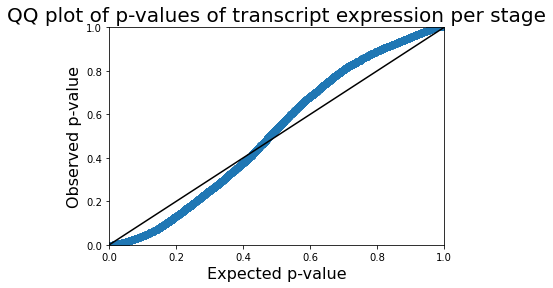

In [13]:
# plot QQ plot of pvalues
fig, ax = plt.subplots()
ax.scatter(pval_df_sorted["uniform_pval"], pval_df_sorted["pvalue"])
ax.plot([1,0], [1, 0], color = "black")

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Expected p-value", fontsize = 16)
plt.ylabel("Observed p-value", fontsize = 16)
plt.title("QQ plot of p-values of transcript expression per stage", fontsize=20)
    
plt.show()

In [14]:
# determine genes with diff expression with FDR of 10% written to file
FDR_pval = np.array(pval_df_sorted['transcript'][multitest.multipletests(pval_df_sorted["pvalue"], method = "fdr_bh", alpha = 0.10)[0]])
np.savetxt('genes_diff_exp_FDR0.10.txt', FDR_pval, fmt='%s')

In [15]:
# repeat analysis controlling for sex
pval_sex = []
beta_sex = []
for tran in range(0, len(transcripts)):
    arr_transcript = np.array(diff_exp_df[transcripts[tran]])
    arr_trans_float = []
    for val in range(0, len(arr_transcript)):
        arr_trans_float.append(float(arr_transcript[val]))
    df = pd.DataFrame({'y':arr_trans_float, 'x':stage, 'z': gender})
    model = smf.ols(formula = "y ~ x + z", data = df)
    results = model.fit()
    pval_sex.append(results.pvalues[1])
    beta_sex.append(results.params[5])


In [16]:
# determine genes with diff expression with FDR of 10% written to file
pval_sex_df = pd.DataFrame({'transcript': transcripts, 'pvalue': pval_sex, 'beta': beta_sex})
FDR_pval_sex = np.array(pval_sex_df['transcript'][multitest.multipletests(pval_sex_df["pvalue"], method = "fdr_bh", alpha = 0.10)[0]])
np.savetxt('genes_diff_exp_gender_FDR0.10.txt', FDR_pval_sex, fmt='%s')
pval_sex_df['logP'] = -1 * np.log10(pval_sex_df['pvalue'])
pval_sex_df['FDR'] = multitest.multipletests(pval_sex_df["pvalue"], method = "fdr_bh", alpha = 0.10)[0]
pval_sex_df


,transcript,pvalue,beta,logP,FDR
0,FBtr0302347,0.073356,-0.010210,1.134563,False
1,FBtr0113885,0.403055,-0.903806,0.394636,False
2,FBtr0301810,0.001765,-0.656229,2.753333,False
3,FBtr0113895,0.386666,-1.291499,0.412664,False
4,FBtr0345179,0.001727,0.399967,2.762758,False
...,...,...,...,...,...
8608,FBtr0100884,0.000498,-0.440106,3.303118,True
8609,FBtr0100886,0.005839,-0.844865,2.233662,False
8610,FBtr0100888,0.003072,0.355380,2.512619,False
8611,FBtr0114261,0.021865,-0.347088,1.660259,False


In [17]:
# calculate percent overlap
count = 0
for trans in range(0, len(FDR_pval_sex)):
    if FDR_pval_sex[trans] in FDR_pval:
        count += 1

percent_overlap = (count/len(FDR_pval))*100
percent_overlap


82.6086956521739

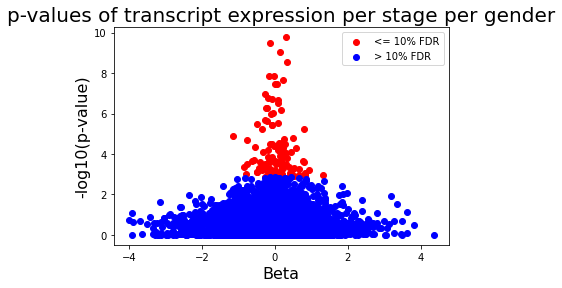

In [20]:
# plot volcano
fig, ax = plt.subplots()
ax.scatter(pval_sex_df["beta"][pval_sex_df['FDR'] == True], pval_sex_df["logP"][pval_sex_df['FDR'] == True], color = 'Red', label = "<= 10% FDR")
ax.scatter(pval_sex_df["beta"][pval_sex_df['FDR'] == False], pval_sex_df["logP"][pval_sex_df['FDR'] == False], color = 'Blue', label = "> 10% FDR")
plt.xlabel("Beta", fontsize = 16)
plt.ylabel("-log10(p-value)", fontsize = 16)
plt.title("p-values of transcript expression per stage per gender", fontsize=20)
plt.legend()
plt.show()
